Recognizing Shapes in Objects with OpenCV
=========================================


Import libraries.

In [58]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Image filenames.

In [59]:
files = (
    'subway.jpg',
)
f = os.path.join('images', files[0])

Define a function for viewing images.

In [60]:
def view_image(image, cmap=None):
  if len(image.shape) == 2 or image.shape[2] == 1:
      cmap = cmap or 'gray'
  else:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10,8))
  plt.imshow(image, cmap=cmap)
  plt.show()


Read an image from file.

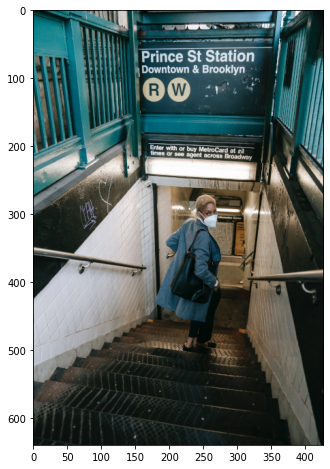

In [61]:
image = cv2.imread(f)
view_image(image) 

Inspect image contents

In [62]:
print(image.shape)

(640, 427, 3)


Gray-scale

(640, 427)
18


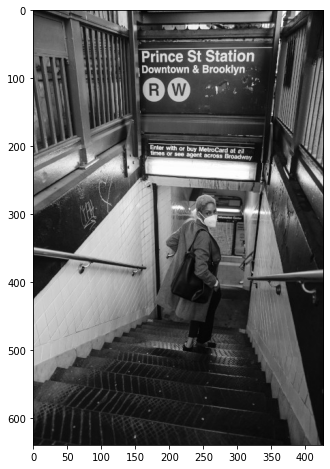

In [63]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_gray.shape)
print(image_gray[0, 0])
view_image(image_gray)

## X Gradient Calculation Using Sobel Operator

The Sobel operator is used to detect edges in the image by calculating the gradient of the image intensity. In this code chunk, we apply the Sobel operator along the x-axis to highlight vertical edges.


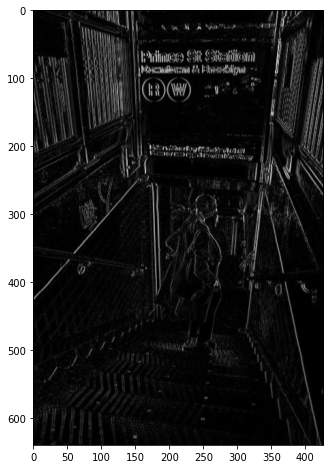

In [64]:
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0)
abs_sobelx = np.abs(sobelx)
view_image(abs_sobelx / np.max(abs_sobelx))

## Y Gradient

The Sobel operator is a popular edge detection algorithm used to highlight gradients in an image. In this case, we apply the Sobel operator along the y-axis to detect vertical edges. The `cv2.Sobel` function takes several parameters:

- `image_gray`: The input grayscale image.
- `cv2.CV_64F`: The desired depth of the output image. Using a 64-bit float ensures that we capture both positive and negative gradients.
- `0`: The order of the derivative in the x-direction. Setting this to 0 means we are not detecting edges along the x-axis.
- `1`: The order of the derivative in the y-direction. Setting this to 1 means we are detecting edges along the y-axis.

After applying the Sobel operator, we take the absolute value of the resulting matrix to ensure all gradients are positive. Finally, we normalize the values to the range [0, 1] and display the image using the `view_image` function. This visualization helps us see the vertical edges in the original image.

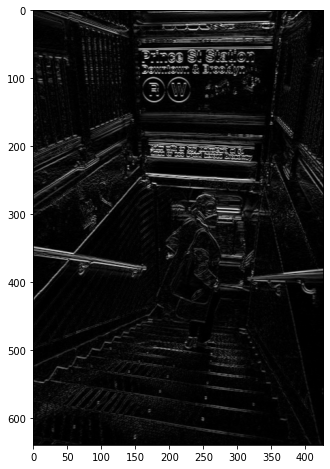

In [65]:
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1)
abs_sobely = np.abs(sobely)
view_image(abs_sobely / np.max(abs_sobely))

## Magnitude of Gradient Vector

The magnitude of the gradient vector is a crucial measure in edge detection, indicating the strength of edges at each pixel in the grayscale image. It is computed by combining the gradients in both the x and y directions, obtained using the Sobel operator. The resulting magnitude represents the overall edge intensity, providing a comprehensive view of the edges in the image.


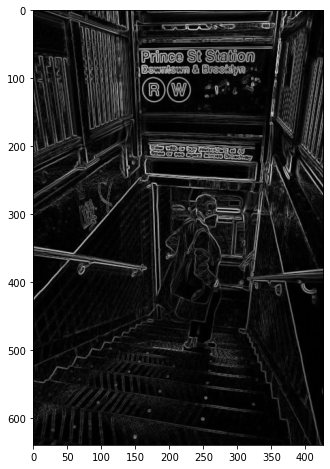

In [66]:
magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)
view_image(magnitude / np.max(magnitude))

## Canny Edge Detection

The Canny edge detection algorithm is a popular method for identifying edges in an image. It involves a multi-stage process that includes gradient calculation, non-maximum suppression, and hysteresis thresholding. In this code, the `cv2.Canny` function is applied to the grayscale image with threshold values of 200 and 250, resulting in a binary image where the edges are highlighted. The detected edges are then visualized using the `view_image` function.


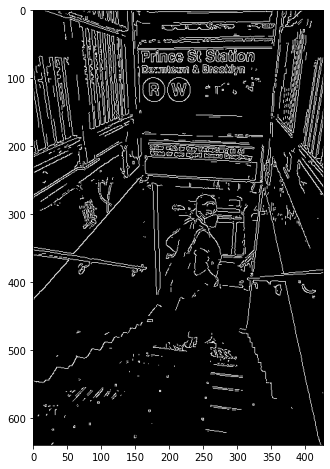

In [67]:
edges = cv2.Canny(image_gray, 200, 250)
view_image(edges)

Theory: Hough transforms

![title](images2/line_diagram.png)

![title](images2/accumulator1.png)

![title](images2/edge_pixel.png)

![title](images2/accumulator2.png)

![title](images2/accumulator3.png)


## Hough Transform for Lines

The Hough Transform is a technique used to detect lines in an image. In this code, the `cv2.HoughLinesP` function is applied to the edge-detected image to find line segments. The parameters `rho` and `theta` define the resolution of the accumulator array, while `threshold` specifies the minimum number of votes needed for a line to be detected. The `minLineLength` and `maxLineGap` parameters help in filtering out shorter lines and bridging gaps in longer lines, respectively. Detected lines are then drawn on a copy of the original image using the `cv2.line` function, with each line represented in red (BGR: `(0,0,255)`). The result is visualized using the `view_image` function.

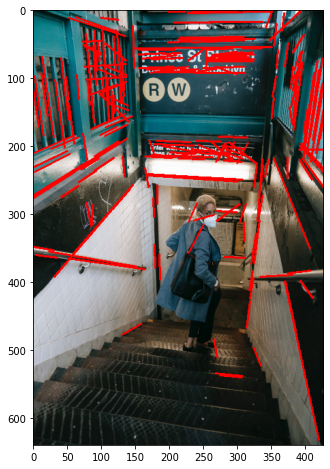

In [68]:
lines = cv2.HoughLinesP(
  edges,
  rho = 1,
  theta= 2 * np.pi/180.0,
  threshold=20,
  minLineLength=25,
  maxLineGap=5
)

i_lines = image.copy()
for l in lines:
  x1, y1, x2, y2 = l[0]
  cv2.line(i_lines, (x1, y1), (x2, y2), (0,0,255), thickness=2)
view_image(i_lines)

## Hough Transform for Circles

The Hough Circle Transform is a technique used to detect circles in an image. It uses a voting procedure in a parameter space, where potential circles are identified based on the accumulation of votes. In this code, the `cv2.HoughCircles` function is applied with specific parameters to detect circles in the grayscale image. The detected circles are then drawn on a copy of the original image with a red outline and visualized using the `view_image` function.


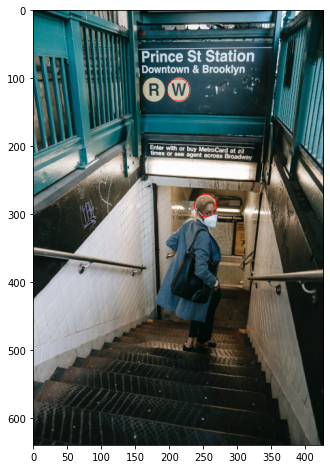

In [69]:
circles = cv2.HoughCircles(
    image_gray,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=35,
    param1=150,
    param2=60,
    minRadius=15,
    maxRadius=25
)

i_circles = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(
            i_circles,
            (x, y),
            r,
            (0, 0, 255),
            thickness=1
        )

view_image(i_circles)


Blur the image first

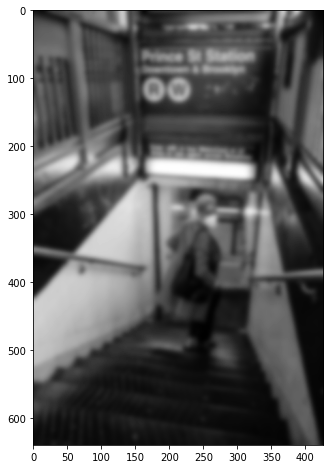

In [70]:
i_blurred = cv2.GaussianBlur(
  image_gray,
  ksize=(21,21),
  sigmaX=0,
)
view_image(i_blurred)

## Hough Transform for Circles on Blurred Image

The Hough Circle Transform is also applied to a blurred version of the image to enhance the detection of circles. Blurring helps to reduce noise and improve the accuracy of circle detection. In this code, the `cv2.HoughCircles` function is used with the blurred image as input. The detected circles are then drawn on a copy of the original image with a thicker red outline for better visibility and visualized using the `view_image` function.

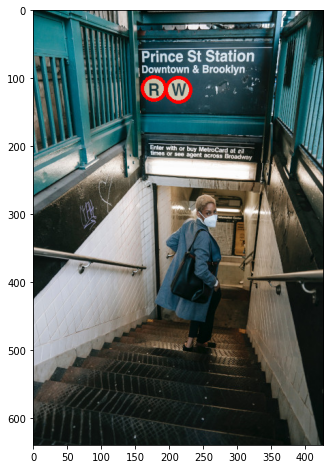

In [71]:
circles = cv2.HoughCircles(
    i_blurred,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=35,
    param1=150,
    param2=40,
    minRadius=15,
    maxRadius=25
)

i_circles = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(
            i_circles,
            (x, y),
            r,
            (0, 0, 255),
            thickness=3
        )

view_image(i_circles)
